In [1]:
# data processing packages
import numpy as np   
import pandas as pd 
import scipy as sp

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *
 
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import IPython
from IPython.display import display

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import itertools

import random

# machine leanring packages
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [ ]:
# TO DO:
# change dection:
# causal dependence:

# HMM
# Markov chain
# LSTM 

# sequence to real-value:  sequence to predict power consumption 


# Neural Models for Modeling and Predicting Information Interaction Behavior 

# # Stl: A seasonal-trend decomposition procedure based on loess

# SOC decreasing on stable state 

In [2]:
def multivariate_ts_plot( dta_df, title_str ):
        
    matplotlib.rcParams.update({'font.size': 15})
    figure_size = (15.4,7)
    legend_font = 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )
    
    tmpt = range(dta_df.shape[0])
    for i in dta_df.columns:
        
        tmpx = list(dta_df[i])    
        plt.plot( tmpt, tmpx, label= i )

    axes = plt.gca()
#     axes.set_xlim([1, tdf.shape[0]+10])
    axes.set_ylim([-200, 300])

    # plt.plot( list( clean_tdf['value']), color='g' )

    # plt.xticks([1,2,3,4,5], ['5','10','15','20','25'] )
    # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    # axes.xaxis.set_ticks( ['5m', '10m', '15m','20m'] ) 
    # axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title( title_str )
    plt.ylabel('Value')
    plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
    plt.legend(loc='upper left')
    #     bbox_to_anchor=(0., 1.0, 1., .10),
    #            loc=0,
    #            ncol=5, mode="expand", borderaxespad=0., fontsize= legend_font , numpoints=1 )
    
    
# parse timestamp to extract seconds
def month_tick( month  ):
    days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31 ]    
    return sum(days[:month-1])*3600*24

def day_tick( day ):
    return (day-1)*3600*24

def hour_tick( hour ):
    return hour*3600

def minutes_tick( minute ):    
    return minute*60

def cal_second_tick( tup, bias ):
    tmp_len = len(tup[4])
    
    return float(tup[0])*0 + month_tick( int(tup[1]) ) +  day_tick( float(tup[2]) ) + \
           hour_tick( float(tup[3]) ) \
           + minutes_tick( float(tup[4][ tmp_len-5 : tmp_len-3 ]) ) + float(tup[4][ tmp_len-2 : tmp_len ]) - bias
    
    
def build_second_col( dta_df, bias ):
    tmpdta = dta_df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'RECEIVETIME']]
    
    return tmpdta.apply( lambda x: cal_second_tick(x, bias), axis=1) 
    

In [4]:
# load data
addr   = "/home/guo/nn_work/dataset/dataset_tsAna/sample_dta.csv"
dta_df = pd.read_csv(addr, sep=',')

# add continuous timestampes by transforming RECEIVE TIME
dta_df['SECOND'] =  build_second_col( dta_df, 10791024 )

print 'Shape of the dataset: ', dta_df.shape
# dta_df.columns

Shape of the dataset:  (999, 27)


In [5]:
# CHANGE DETECTION

# test over variances
def change_detection_univariate_score_var( ts_l, ts_r):
    
    ml = mean(ts_l)
    mr = mean(ts_r)
    
    varl = var(ts_l)
    varr = var(ts_r)
    
#     print varl,varr,ts_l
    
    f_test = varl*1.0/(varr)
    p_value = sp.stats.f.cdf(f_test, len(ts_l), len(ts_r))
    
    return p_value

# test over means
def change_detection_univariate_score_mean( ts_l, ts_r):
    
    ml = mean(ts_l)
    mr = mean(ts_r)
    
    varl = var(ts_l)
    varr = var(ts_r)
    
#     tmp_std = ( (len(ts_l)-1.0)*varl + (len(ts_r)-1.0)*varr )/( len(ts_l)+len(ts_r)-2.0 )
#     t_test  = (ml-mr)*1.0/tmp_std/sqrt( 1.0/len(ts_l)+1.0/len(ts_l) ) 
    
    return sp.stats.ttest_ind( ts_l, ts_r )[1]
    
def change_detection_univariate( ts_list,  ):
    
    h = len(ts_list)
    pre_cutoff = 0
    i = 0
    
    cutoff_list = []
    
    while i < h:
        
        if i-pre_cutoff < min_len:
            i+=1
            continue
        
        tmp_score = []
        for j in range(pre_cutoff+4, i):
            
            mean_score = change_detection_univariate_score_mean(ts_list[pre_cutoff+1:j], ts_list[j:i+1])
            var_score  = change_detection_univariate_score_var(ts_list[pre_cutoff+1:j], ts_list[j:i+1]) 
            
            print mean_score, var_score, '\n'
            
            if var_score <= 0.001 or var_score >= 0.999:  
#             mean_score <= 0.01: 
#             or (   var_score <= 0.01 or var_score >= 0.99  ):
                cutoff_list.append(j)
                pre_cutoff = j
                
                break
                
#             tmp_score.append( change_detection_univariate_score(ts_list[pre_cutoff+1:j], ts_list[j:i+1]) )        
    
    return cutoff_list 

def change_detection_multivariate( ts_list, start_bias, min_len ):
    return 0.0


def change_detection_univariate_win_statis( ts_list, win_size ):
    
    i = 0
    cnt = len(ts_list)/win_size 
    win_statis = []
    
    for i in range(cnt):
        tmpdta = ts_list[ i*win_size: (i+1)*win_size ]
        win_statis.append( ( i*win_size, mean(tmpdta), var(tmpdta)) )
        
    tmpdta = ts_list[ cnt*win_size: ]
    win_statis.append( ( cnt*win_size, mean(tmpdta), var(tmpdta)) )
    
    return win_statis


# CHANGE POINT DETECTION

# mean and variacne test based approaches:
# not suitable for long sequence, minor change in mean/variance is siginificant for long sequences. 

# compare pre and merged
win_statis = change_detection_univariate_win_statis( list(dta_df[ 'TOTALCURRENT' ]), 20 )

cnt = len(win_statis)
dta = list(dta_df[ 'TOTALCURRENT' ])

prel=0
prer=0

for i in range(1,cnt-1):
    
    prer = win_statis[i][0]
    predta = dta[prel:prer]
    
    premean = mean(predta)
    prevar  = var(predta)
    
    cur_dta = dta[ win_statis[i][0]:win_statis[i+1][0] ]
    
    merged_r = win_statis[i+1][0]
    merged_dta = dta[prel:merged_r]
    
    merged_mean = mean(merged_dta)
    merged_var  = var(merged_dta)
        
    f_test = merged_var*1.0/(prevar)
    var_pval  = sp.stats.f.cdf(f_test, len(merged_dta), len(predta))
    
    
    mean_pval = sp.stats.ttest_ind( predta, cur_dta, equal_var= False )[1]
    
    
    if mean_pval< 0.01:
        prel = win_statis[i][0]
        print 'mean', prel, premean, len(predta), mean(cur_dta)
    
    elif var_pval < 0.01 or var_pval > 0.99:
        prel = win_statis[i][0]
        
        print 'var', prel, prevar, merged_var
    
        
# compare pre and cur
win_statis = change_detection_univariate_win_statis( list(dta_df[ 'TOTALCURRENT' ]), 20 )

print win_statis

cnt = len(win_statis)
dta = list(dta_df[ 'TOTALCURRENT' ])

prel=0
prer=0

for i in range(1,cnt-1):
    
    prer = win_statis[i][0]
    predta = dta[prel:prer]
    
    premean = mean(predta)
    prevar  = var(predta)
    
    cur_dta = dta[ win_statis[i][0]:win_statis[i+1][0] ]
    curmean = mean(cur_dta)
    curvar  = var(cur_dta)
        
    f_test = curvar*1.0/(prevar)
    var_pval  = sp.stats.f.cdf(f_test, len(cur_dta), len(predta))
    
    mean_pval = sp.stats.ttest_ind( predta, cur_dta )[1]
    
    if mean_pval< 0.01:
        prel = win_statis[i][0]
        print 'mean', prel, premean, curmean
    
    elif var_pval < 0.01 or var_pval > 0.99:
        prel = win_statis[i][0]
        print 'var', prel, prevar, curvar
    

In [ ]:
# CHANGE POINT DETECTION

# Dynamic programming paradigm
for c in range(C):
    
    for i in range(n):
        
        f[i][c- vol[i]]

for i in range(n):
    for c in range(C):
        f[i][]
        
for c in range(C):
    for i in range(n):
        
        f[i][c] = max(f[i-1][c- vol[i] ], f[i-1][c]) 
    
for i in range(n):
    for c in range(C):
        f[i][c] = max( f[i-1][c-vol[i]],  f[i-1][c] )

for i in range(n):
    for c in range(C, vol[i],-1):
        f[c] = max(f[c-vol[i], f[c]])
        
for i in range(c):
    for c in range(C):
        
        f[c] = max(f[c-vol[i], f[c]])
        

In [36]:
# CHANGE POINT DETECTION

# Bayes approach

# posterior of change point number 
# variant of Viterbi algorithm
# global optimization via dynamic programming

# maximum likelihood
def lk_cal( dta ):
    
    m = mean(dta)
    v = var(dta)
    return sum([log(sp.stats.norm.pdf(tmpx, m, sqrt(v))) for tmpx in dta])

# learning
dta = list(dta_df[ 'TOTALCURRENT' ][:600])
num = len(dta)

# number of change points
M = 15
# minmum amount of data in one segment
min_len = 40

f_lk  = [ [0 for i in range(M+1)] for _ in range(num+1) ]
f_pos = [ [0 for i in range(M+1)] for _ in range(num+1) ]

# initialize state functions
for j in range(M+1):
    f_lk[0][j] = 0.0    
    
for i in range(min_len):
    for j in range(M+1):
        f_lk[i][j] = lk_cal(dta[ :i+1])

for i in range(num):
    f_lk[i][0] = lk_cal(dta[ :i+1])

    
# precompute the likelihood of sub-series
table_lk = [ [0 for i in range(num+1)] for _ in range(num+1) ]

for i in range( min_len, num ):
    
    print i
    
    for j in range(15, i-15):    
        table_lk[i][j] = lk_cal(dta[j:i+1])

        
# main loop   
for end_pos in range(min_len, num):
    
#     print end_pos
    
#   constraints on real scale
    for num_seg in range(1,M+1):
        
        tmp = []
        
#       speed up trick
        for seg_pos in range( 15, end_pos-15, 2 ):
            
            tmplk = table_lk[end_pos][seg_pos]
#             lk_cal(dta[seg_pos:end_pos+1])
            
#             if tmplk>0:
#                 print "---", seg_pos, end_pos
            
            tmp.append( (seg_pos, (tmplk + f_lk[seg_pos-1][num_seg-1]) ) )    
            
        
        tmp_tuple = max(tmp, key = lambda x: x[1])
        f_lk[end_pos][num_seg]  = tmp_tuple[1]
        f_pos[end_pos][num_seg] = tmp_tuple[0]
        
print f_lk[num-1]

# inference
cutoff_set = []
tmp_pos = num-1
for i in range(M,0,-1):
    cutoff_set.append(f_pos[tmp_pos][i])
    tmp_pos = f_pos[tmp_pos][i]-1

    
# posterior of M
M_range = 10
lk_list = []
for i in range(1, M_range):
    lk_list.append( (i, lk) )
    
tmpsum = sum(lk_list)    
posterior_m = [i*1.0/tmpsum for i in lk_list]
    

In [25]:
# main loop   
for end_pos in range(min_len, num):
    
#     print end_pos
    
#   constraints on real scale
    for num_seg in range(1,M+1):
        tmp = []
        
#       speed up trick
        for seg_pos in range( 15, end_pos-15 ):
            
            tmplk = table_lk[end_pos][seg_pos]
            
#             if tmplk>0:
#                 print "---", seg_pos, end_pos
            
            tmp.append( (seg_pos, (tmplk + f_lk[seg_pos-1][num_seg-1]) ) )    
        
        tmp_tuple = max(tmp, key = lambda x: x[1])
        f_lk[end_pos][num_seg]  = tmp_tuple[1]
        f_pos[end_pos][num_seg] = tmp_tuple[0]
        
print f_lk[num-1]


[-3362.8760044249102, -2344.3766559475625, -1717.0312111629598, -1495.0211136850157, -1314.1120187262784, -1211.8418226041501, -1073.4980719307555, -942.78956682508692, -853.7119366009706, -786.58961228790236, -697.51198206378626, -634.22637206244076, -589.22938289142689, -545.97891225768171, -524.35557153412651, -508.38848855608518]


In [5]:
# CHANGE POINT DETECTION

# Greedy approach based on likelihood test
dta = list(dta_df[ 'TOTALCURRENT' ])
num = len(dta)

step = 35

st_search = 0
st_window = 0

cutoff_set = []

for i in range( step, num, step ):
    
    tmplk = []
    for j in range( st_window, i ):
        
        tmpl = dta[st_window : j]
        tmpr = dta[j : i]
    
        ml = mean(tmpl)
        vl = var(tmpl)
    
        mr = mean(tmpr)
        vr = var(tmpr)
    
#         lk_l = sum([ min(log(sp.stats.norm.pdf(tmpx, ml, sqrt(vl))), 0.0) for tmpx in tmpl])
#         lk_r = sum([ min(log(sp.stats.norm.pdf(tmpx, mr, sqrt(vr))), 0.0)  for tmpx in tmpr])
        
        lk_l = sum([ log(sp.stats.norm.pdf(tmpx, ml, sqrt(vl))) for tmpx in tmpl])
        lk_r = sum([ log(sp.stats.norm.pdf(tmpx, mr, sqrt(vr)))  for tmpx in tmpr])
        
        tmplk.append( (j, lk_l+lk_r) )
    
    ref_dta = dta[st_window : i]
    ref_m = mean(ref_dta)
    ref_v = var(ref_dta)
    ref_lk = sum([ log(sp.stats.norm.pdf(tmpx, ref_m, sqrt(ref_v))) for tmpx in ref_dta ])
    
    tmplk_min = min(tmplk, key = lambda x: x[1])[1]
    tmplk_max = max(tmplk, key = lambda x: x[1])[1]
    
    tmpidx = max(tmplk, key = lambda x: x[1])[0]
    
#     print "---", st_window, st_search, i, tmplk_min, tmplk_max, ref_lk
    
    if abs(ref_lk-tmplk_max) > 0.3*abs(ref_lk):
        
        st_window = tmpidx
        cutoff_set.append( tmpidx )
       
        print tmpidx, st_window, ref_lk, tmplk_max
    
    st_search = i   
    

11 11 -176.083519582 -34.8590118405
47 47 -330.93435231 -159.65855354
177 177 -1946.83133748 -1315.24688437
422 422 -1359.40899921 -759.359487977
455 455 12.8310185565 83.6298207006
867 867 -801.205190586 513.005750071


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


In [ ]:
# Segmentation and Labelling

# HMM hidden markov model
from hmmlearn import hmm

def parse_hidden_states_hmm( hstates ):
    
    seg = []
    cutoff = []
    
    cnt = len(z)
    
    pre = 0
    for i in range(1,cnt):
        if z[i]!=z[i-1]:
            seg.append( (z[i-1], pre, i-1) )
            pre = i
            
            cutoff.append( i )
            
    seg.append((z[cnt-1], pre, cnt-1))
    
    return seg, cutoff


dta = np.array(dta_df[ 'TOTALCURRENT' ])
dta = np.reshape(dta, [-1,1] )
print np.shape(dta)

seg_model = hmm.GaussianHMM(n_components = 3, covariance_type="full", n_iter=500, verbose= False)
seg_model.fit(dta)  

z = seg_model.predict(dta)

seg_set, cutoff_set = parse_hidden_states_hmm( z )

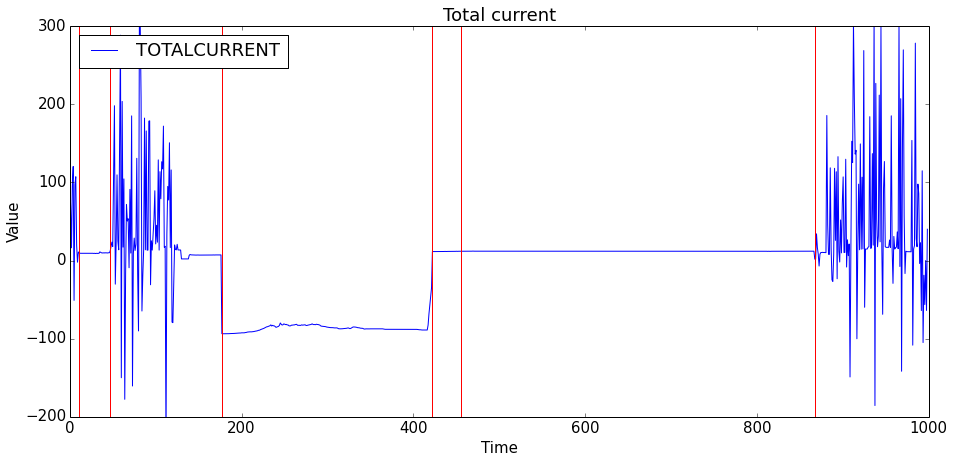

In [6]:
# visualiation of change detection and segmentation
multivariate_ts_plot( dta_df[['TOTALCURRENT']], "Total current" )

for i in cutoff_set:
    plt.axvline(x=i, color = 'red')